In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn as sk

In [59]:
df=pd.read_csv('Titanic-Dataset.csv')

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select columns for imputation
columns_to_impute = ['Age', 'Fare']  # Add any other relevant columns

# Create an imputer object
imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform imputation
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Fill Cabin and Embarked with placeholders/mode as before
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check for remaining null values
null_values_after = df.isnull().sum()

# Display the result
print(null_values_after)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [66]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column data type is 'object' (categorical)
    if df[col].dtype == 'object':
        # Use LabelEncoder for columns with low cardinality
        if len(df[col].unique()) <= 10:
            df[col] = le.fit_transform(df[col])
        # Use One-Hot Encoding for columns with high cardinality
        else:
            df = pd.get_dummies(df, columns=[col], drop_first=True)

# Display the DataFrame after encoding
print(df.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    1  22.0      1      0   7.2500         2   
1            2         1       1    0  38.0      1      0  71.2833         0   
2            3         1       3    0  26.0      0      0   7.9250         2   
3            4         1       1    0  35.0      1      0  53.1000         2   
4            5         0       3    1  35.0      0      0   8.0500         2   

   Name_Abbott, Mr. Rossmore Edward  ...  Cabin_F E69  Cabin_F G63  \
0                             False  ...        False        False   
1                             False  ...        False        False   
2                             False  ...        False        False   
3                             False  ...        False        False   
4                             False  ...        False        False   

   Cabin_F G73  Cabin_F2  Cabin_F33  Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  \
0        False     

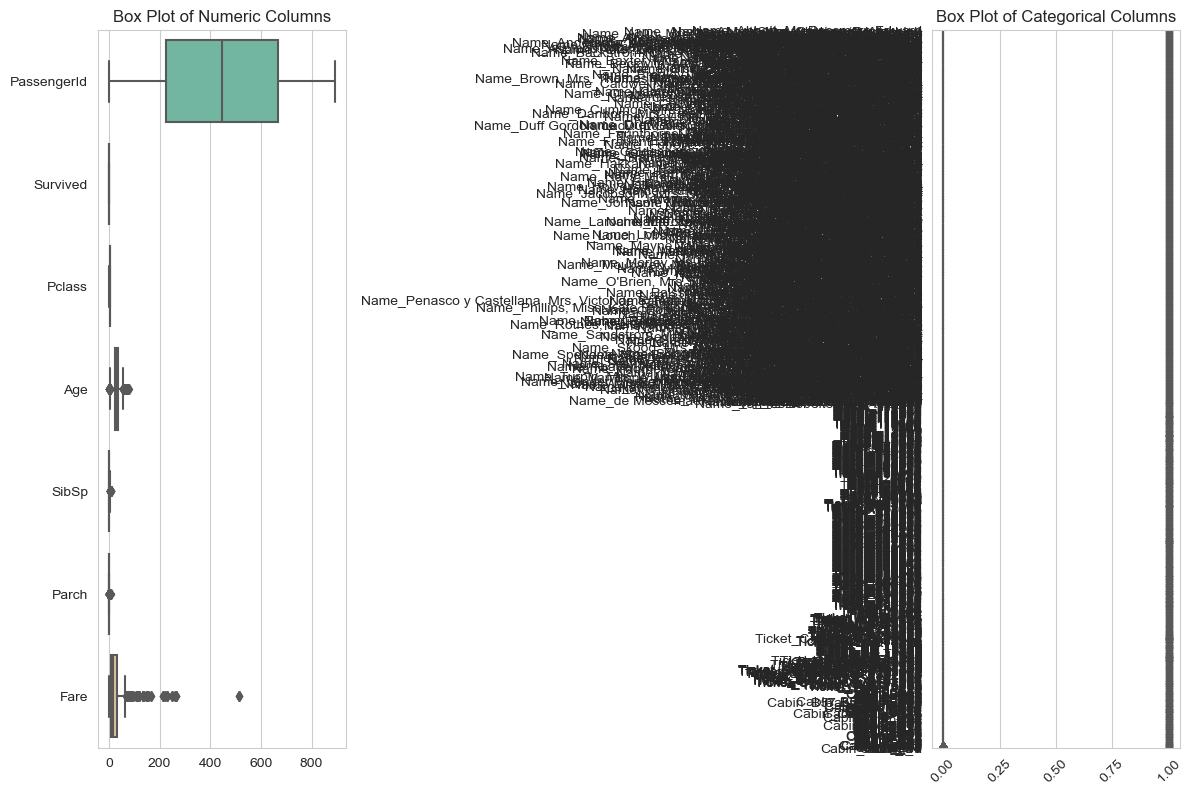

In [67]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['bool']).columns

# Set up the figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot boxplots for numeric columns
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Columns')

# Plot boxplots for categorical columns
plt.subplot(1, 2, 2)
sns.boxplot(data=df[categorical_cols], orient="h", palette="Set2")
plt.title('Box Plot of Categorical Columns')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [68]:


# # Define columns for outlier removal
# columns_to_check = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# # Calculate z-scores for specified columns
# z_scores = np.abs((df[columns_to_check] - df[columns_to_check].mean()) / df[columns_to_check].std())

# # Define threshold for z-score
# threshold = 3

# # Remove rows where any z-score exceeds the threshold
# df_filtered = df[(z_scores < threshold).all(axis=1)]

# # Display the shape before and after outlier removal
# print("Shape before outlier removal:", df.shape)
# print("Shape after outlier removal:", df_filtered.shape)


In [69]:

# Define columns for outlier removal
columns_to_check = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Calculate z-scores for specified columns
z_scores = np.abs((df[columns_to_check] - df[columns_to_check].mean()) / df[columns_to_check].std())

# Define threshold for z-score
z_score_threshold = 3

# Identify outliers using z-score
outliers_zscore = (z_scores >= z_score_threshold).any(axis=1)

# Calculate IQR for specified columns
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for IQR
IQR_threshold = 1.5

# Identify outliers using IQR
outliers_iqr = ((df[columns_to_check] < (Q1 - IQR_threshold * IQR)) | (df[columns_to_check] > (Q3 + IQR_threshold * IQR))).any(axis=1)

# Combine outlier masks
outliers_combined = outliers_zscore | outliers_iqr

# Remove outliers
df_filtered = df[~outliers_combined]

# Display the shape before and after outlier removal
print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_filtered.shape)


Shape before outlier removal: (891, 1726)
Shape after outlier removal: (577, 1726)


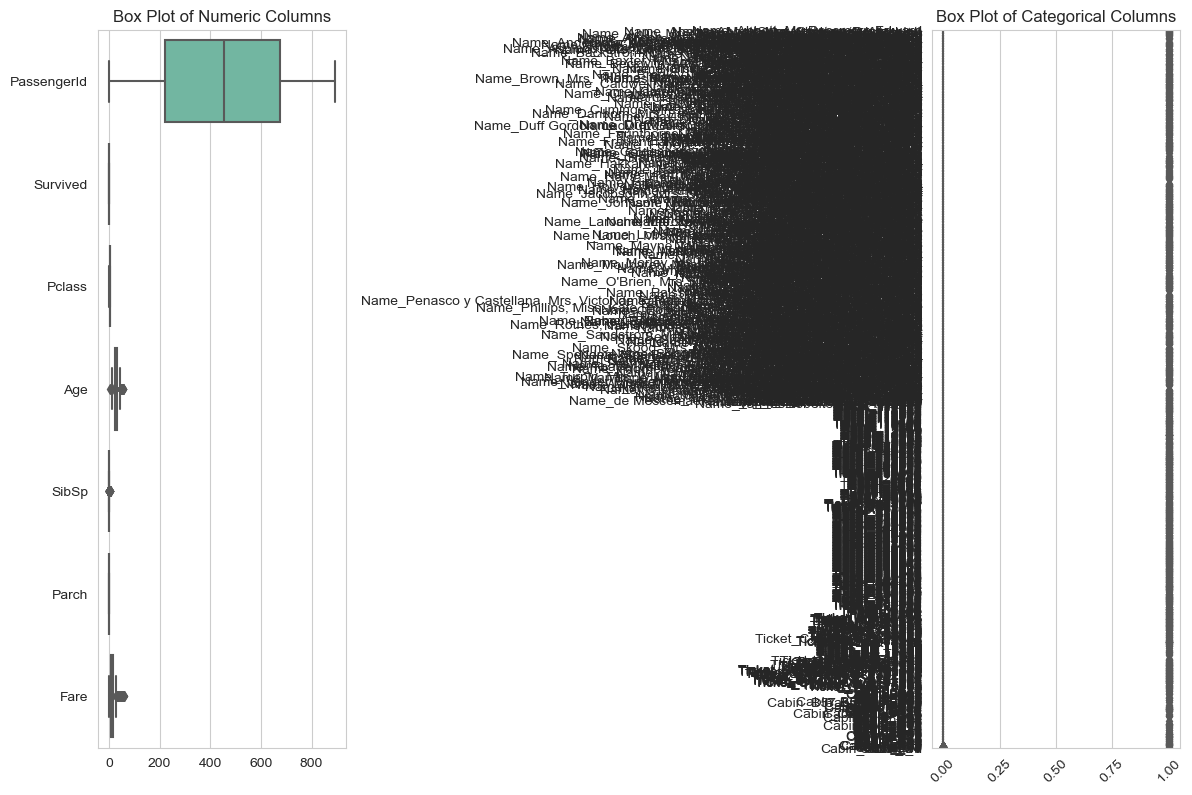

In [70]:
numeric_cols = df_filtered.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_filtered.select_dtypes(include=['bool']).columns

# Set up the figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot boxplots for numeric columns
plt.subplot(1, 2, 1)
sns.boxplot(data=df_filtered[numeric_cols], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Columns')

# Plot boxplots for categorical columns
plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered[categorical_cols], orient="h", palette="Set2")
plt.title('Box Plot of Categorical Columns')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

C:\Users\glast\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


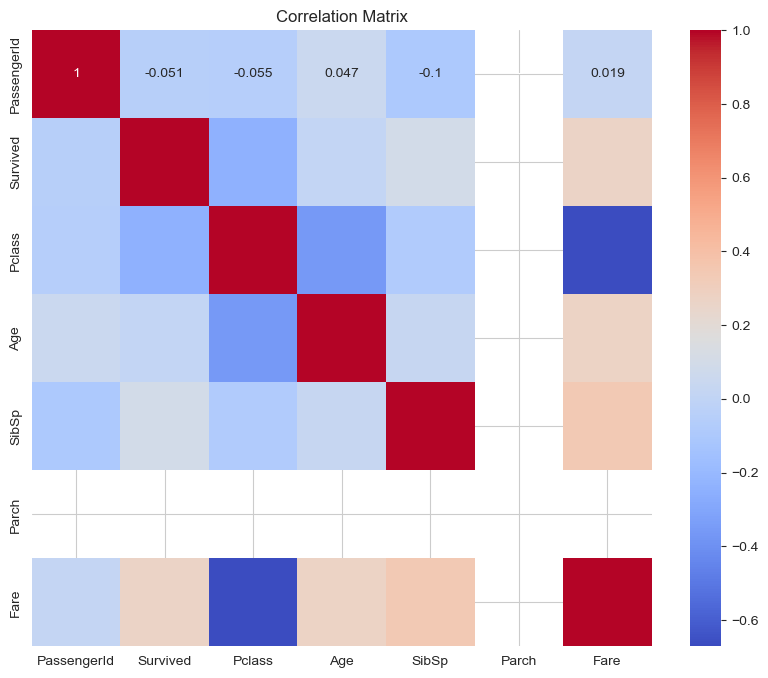

Selected Features:
Index(['PassengerId', 'Survived', 'Sex', 'SibSp', 'Parch', 'Embarked',
       'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel',
       'Name_Abelson, Mrs. Samuel (Hannah Wizosky)',
       ...
       'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33',
       'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Cabin_Unknown'],
      dtype='object', length=1723)


In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns from df_filtered
numeric_columns = df_filtered.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_filtered[numeric_columns]

# Calculate correlation matrix for numeric columns
correlation_matrix = df_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Define correlation threshold
threshold = 0.15

# Initialize set to store highly correlated features
highly_correlated_features = set()

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Check if absolute correlation value exceeds the threshold
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Drop highly correlated features from df_filtered
df_selected = df_filtered.drop(highly_correlated_features, axis=1)

# Print selected features
print("Selected Features:")
print(df_selected.columns)


In [72]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [73]:
# from sklearn.impute import SimpleImputer

# # Initialize SimpleImputer with strategy 'mean' (you can choose a different strategy if needed)
# imputer = SimpleImputer(strategy='mean')

# # Fit and transform the imputer on the training data
# X_train_imputed = imputer.fit_transform(X_train)

# # Transform the test data using the trained imputer
# X_test_imputed = imputer.transform(X_test)

# # Initialize Random Forest model
# rf_model = RandomForestClassifier(n_estimators=160, random_state=42)

# # Train the model on imputed data
# rf_model.fit(X_train_imputed, y_train)

# # Make predictions on the test set
# y_pred = rf_model.predict(X_test_imputed)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


Accuracy: 0.8324022346368715
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       105
           1       0.88      0.69      0.77        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179



In [74]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import accuracy_score, classification_report

# # Initialize SimpleImputer with strategy 'mean'
# imputer = SimpleImputer(strategy='mean')

# # Fit and transform the imputer on the training data
# X_train_imputed = imputer.fit_transform(X_train)

# # Transform the test data using the trained imputer
# X_test_imputed = imputer.transform(X_test)

# # Initialize Random Forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Set up the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Initialize GridSearchCV with the Random Forest model and parameter grid
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
#                            cv=5, n_jobs=-1, verbose=2)

# # Fit the GridSearchCV on the training data
# grid_search.fit(X_train_imputed, y_train)

# # Get the best parameters and best model from GridSearchCV
# best_params = grid_search.best_params_
# best_rf_model = grid_search.best_estimator_

# # Make predictions on the test set with the best model
# y_pred = best_rf_model.predict(X_test_imputed)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Best Model Accuracy:", accuracy)
# print("Best Parameters:", best_params)

# # Classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [75]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

X = df_filtered.drop(columns='Survived')
y = df_filtered['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test)

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Setting up Parameters using GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with the RandomForest model and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X_train_imputed, y_train)


best_rf_model = grid_search.best_estimator_


base_models = [
    ('best_rf', best_rf_model),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier())
]


stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)

# Train the StackingClassifier
stacking_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Model Accuracy:", accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


C:\Users\glast\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\glast\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\glast\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Stacking Model Accuracy: 0.8362068965517241
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90        87
           1       0.75      0.52      0.61        29

    accuracy                           0.84       116
   macro avg       0.80      0.73      0.75       116
weighted avg       0.83      0.84      0.83       116

